### Example

Let’s now apply the Logistic Regression algorithm to the data set
Social_Network_Ads.csv . Our aim is to build a model that tells us
about whether a person of a certain age having a certain income
purchases a product or not, having viewed the social network ads of
the product.

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # MATLAB-like way of plotting

# sklearn package for machine learning in python:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder

In [17]:
df = pd.read_csv('Social_Network_Ads.csv')

In [18]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
df = df.drop(['User ID'], axis = 1)

In [20]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [22]:
#In order to improve the performance from 63% or 0.63
df['EstimatedSalary'] = LabelEncoder().fit_transform(df['EstimatedSalary'])

In [23]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,4,0
1,0,35,5,0
2,1,26,26,0
3,1,27,39,0
4,0,19,57,0


In [24]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [26]:
logre = LogisticRegression()
logre.fit(X_train, y_train)

LogisticRegression()

In [27]:
print('Number of mislabeked points out of a total of %d points: %d' % (X_test.shape[0], (y_test != logre.predict(X_test)).sum()))

Number of mislabeked points out of a total of 134 points: 16


In [28]:
print('Our accuracy is %.2f:' % logre.score(X_test, y_test))

Our accuracy is 0.88:


Text(0, 0.5, 'y')

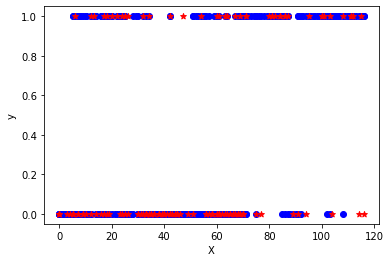

In [29]:
fig1, ax1 = plt.subplots()

ax1.scatter(X[:, 2], y, color = 'blue')
ax1.scatter(X_test[:, 2], logre.predict(X_test), color = 'red', marker = '*')

#ax1.scatter(X, logre.predict_proba(X)[:, 1], color = 'green', marker = '*')

ax1.set_xlabel('X')
ax1.set_ylabel('y')